<a href="https://colab.research.google.com/github/marvin-jung/machine-learning-python/blob/main/Python_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 4 - Linear Regression with Scikit-Learn

## Simple Linear Regression

In [ ]:
# Simple Linear Regression

# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount("/content/gdrive")

# storing the path to the dataset
file = "/content/gdrive/My Drive/Colab Notebooks/datasets/student_scores.csv"

# Reading the file into Python through pandas
dataset = pd.read_csv(file)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Explore the dataset - row and column
dataset.shape

(25, 2)

dataset has 25 rows and 2 columns.

In [ ]:
# See the first five rows of the data
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
# View the statistical details of the dataset
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0.5, 0, 'Hours')

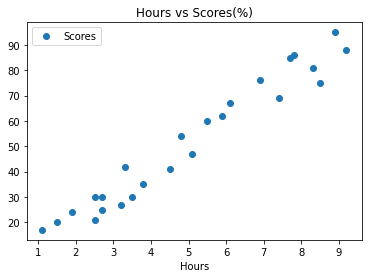

In [ ]:
# Plot the data points on a 2-D graph and see how they are distributed
dataset.plot(x='Hours', y='Scores', style = 'o')
plt.title('Hours vs Scores(%)')
plt.xlabel('Hours')

In [ ]:
# Extract the attributes and labels
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values

In [ ]:
# Import train_test_split() function library
from sklearn.model_selection import train_test_split

# Divide our data into two sets, namely the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

20% of the data
will be used as the test set while the remaining 80% will be used as the training
set

In [ ]:
# Training the algorithm using the LinearRegression class

# import the class
from sklearn.linear_model import LinearRegression

# Instantiate in the linear_regressor instance
linear_regressor = LinearRegression()

# Call the fit() method and pass the training data to it:
linear_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Linear Regression works by finding the best values for
the slope and the intercept.

In [ ]:
# Return intercept and coefficient(the value of the slope)
print(linear_regressor.intercept_)
print(linear_regressor.coef_)  

2.018160041434662
[9.91065648]


If the student studies an extra hour, they will increase their marks by 9.91%

In [ ]:
# Make predictions from the test data
pred_y = linear_regressor.predict(X_test)

# Compare pred_y and y_test and see the amount of similiarity or difference between two
df = pd.DataFrame({'Actual': y_test, 'Predicted':pred_y})
print(df)

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


The model is not accurate, but the values are close to each other.

In [ ]:
# Determine how well the algorithm performed on the dataset
# We will use the test data to determine the values for these metrics

Three evaluation metrics are used for evaluating the accuracy

1. MAE (Mean Absolute Error) - this is the mean of the absolute value of the errors.

2. MSE (Mean Square Error) - this is the mean of squared errors

3. RMSE (Root Mean Squared Error) - this is the square root of the mean of the squared errors.


In [ ]:
# Import the metrics class from Scikit-Learn
from sklearn import metrics

# Calculate MAE, MSE, RMSE
print('MAE:', metrics.mean_absolute_error(y_test, pred_y))
print('MSE:', metrics.mean_squared_error(y_test, pred_y))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_y)))

MAE: 4.183859899002982
MSE: 21.598769307217456
RMSE: 4.647447612100373


The value for root mean squared error is 4.65. <b> *This is less than 10% of mean
value of percentages of all students, which are 51.48.* </b> Conclusion, our algorithm
did a commendable job.

In [ ]:
# END #

## Multiple Linear Regression

The steps between the linear regression and multiple linear regression are almost the same. However, the difference comes
when it comes to evaluation. When evaluating the multiple linear regression model, we need to know the factor with the highest impact on the output variable. We also need to determine the relationship between the various variables.



In [ ]:
# Prediction the consumption of fuel in US states

## We gonna consider factors like per capita income, gas taxes, paved highways
## and the proportion of persons who have a driver's license.

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount("/content/gdrive")

# storing the path to the dataset
file = "/content/gdrive/My Drive/Colab Notebooks/datasets/petrol_consumption.csv"

# Reading the file into Python through pandas
dataset = pd.read_csv(file)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# See the first five rows of the data
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [ ]:
# Explore the dataset - row and column
print(dataset.shape)

(48, 5)


In [ ]:
# View the statistical details of the dataset
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [ ]:
dataset.columns

Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_Consumption'],
      dtype='object')

In [ ]:
# Extract the attributes and labels

# X = dataset.iloc[:,:4].values
# y = dataset.iloc[:,4].values

X = dataset[['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']]
y = dataset['Petrol_Consumption']

In [ ]:
# Import train_test_split() function library
from sklearn.model_selection import train_test_split

# Divide our data into two sets, namely the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Training the algorithm using the LinearRegression class

# import the class
from sklearn.linear_model import LinearRegression

# Instantiate in the linear_regressor instance
linear_regressor = LinearRegression()

# Call the fit() method and pass the training data to it:
linear_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
linear_regressor.coef_

array([-4.00166602e+01, -6.54126674e-02, -4.74073380e-03,  1.34186212e+03])

In [ ]:
# Print coeff to return chosen coefficient
coeff = pd.DataFrame(linear_regressor.coef_, X.columns, columns = ['Coefficient'])
print(coeff)  

                              Coefficient
Petrol_tax                     -40.016660
Average_income                  -0.065413
Paved_Highways                  -0.004741
Population_Driver_licence(%)  1341.862121



 The results show that 

*  Any unit increase in fuel Tax will lead to a decrease of 40.02 million gallons in the gas Consumption.
*  A unit increase in the proportion of
the population with Driver’s license will lead to an increase of 1.342 billion gallons in gas Consumption.
* Average Income and Highways have a very small impact on gas Consumption.


In [ ]:
# Return intercept
print(linear_regressor.intercept_)

425.5993322032433


In [ ]:
# Make predictions from the test data
pred_y = linear_regressor.predict(X_test)

# Compare pred_y and y_test and see the amount of similiarity or difference between two
df = pd.DataFrame({'Actual': y_test, 'Predicted':pred_y})
print(df)

    Actual   Predicted
29     534  469.391989
4      410  545.645464
26     577  589.668394
30     571  569.730413
32     577  649.774809
37     704  646.631164
34     487  511.608148
40     587  672.475177
7      467  502.074782
10     580  501.270734


In [ ]:
# Import the metrics class from Scikit-Learn
from sklearn import metrics

# Calculate MAE, MSE, RMSE
print('MAE:', metrics.mean_absolute_error(y_test, pred_y))
print('MSE:', metrics.mean_squared_error(y_test, pred_y))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_y)))

MAE: 56.8222474789647
MSE: 4666.344787588362
RMSE: 68.31064915215168


<p> The value for the root means the square error is 68.31 as shown above. This is slightly greater than 10% of mean value for gas consumption in all the states. It is true that our algorithm was not very much accurate, but we can still use it to make predictions. </p>
<p> The big error could be brought by a number of factors. Maybe there was a need for more data. We have used data for only one year. Having data collected over multiple years could have helped us improve the accuracy of the model. </p>
<p> Also, we had assumed that our data has a linear relationship. This could not be the case, hence the big error. </p>

In [ ]:
## END OF CHAPTER 4 ##

# Chapter 5 - k-Nearest Neighbors Algorithm

The KNN algorithm is highly used for building more complex classifiers. it is used in numerous applications data compression, economic forecasting, and genetics.

It calculates the distance of the new data point to all the other training data points. The distance can be of various types including Manhattan, Euclidean etc. The K-nearest data points are chosen, in which K can be any integer. Finally, the data point is assigned to the class in which most of the K data points belong to.

Dataset is named iris which is made up of four attributes namely sepal-width, sepal-length, petal-width and petal-length. Each type of the iris plant has certain attributes. Our goal is to predict the class to which a plant belongs to. The dataset has three classes Iris-setosa Iris-versicolor, and Iris-virginica.

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a variable for the dataset url
iris_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign column name to the dataset
names = ['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width', 'Class']

# Read the file into Python through pandas
dataset = pd.read_csv(iris_url, names = names)


In [ ]:
# Divide the dataset into attributes and labels
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,4].values

In [ ]:
# Import train_test_split() function library
from sklearn.model_selection import train_test_split

# Divide our data into two sets, namely the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Scale the features - all the features will be evaluated uniformly

# Import this class
from sklearn.preprocessing import StandardScaler

# Instantiate the class, the instance was given the name feature_scaler.
feature_scaler = StandardScaler()

# Scale fitting to X_train 
feature_scaler.fit(X_train)

# Transform X_train and X_test
X_train = feature_scaler.transform(X_train)
X_test = feature_scaler.transform(X_test)

In [ ]:
# Import the KNeighborsClassifier from the Scikit-Learn library
from sklearn.neighbors import KNeighborsClassifier

# Train the algorithm
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

We have used 5 as the value of this parameter, and this basically denotes the value of K.

In [ ]:
# Make predictions using the test data
pred_y = knn_classifier.predict(X_test)

In [ ]:
# Create confusion matrix and classification report incluing precision, recall, and f1 score

# Import library
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, pred_y))
print(classification_report(y_test, pred_y))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



The KNN algorithm did a good job in classifying the 30 records that we have in the test dataset. The results show that the average accuracy of the algorithm on the dataset was about 90%.

**Comparing K Value with the Error Rate**

Find the best value of K is by plotting a graph of K value and the corresponding error for the dataset. We should begin by calculating the mean of error for the predicted value with K ranging between 1 and 40.

In [ ]:
error = []

# K values range between 1 and 40
for x in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors = x)
  knn.fit(X_train, y_train)
  pred_x = knn.predict(X_test)
  error.append(np.mean(pred_x != y_test))

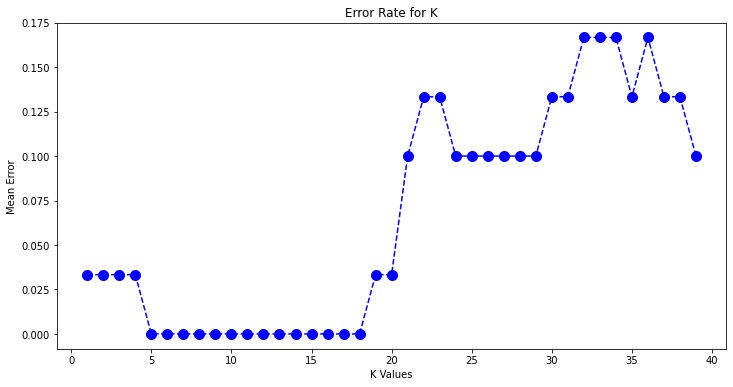

In [ ]:
# Plot the values of error against the values of K
plt.figure(figsize = (12, 6))
plt.plot(range(1, 40), error, color = 'blue', linestyle = 'dashed', marker = 'o',
         markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate for K')
plt.xlabel('K Values')
plt.ylabel('Mean Error')
plt.show()

The graph shows that we will get a Mean Error of 0 when we use values of K between 5 and 18. It will then be good for you to play around with the value of K and see its impact on the accuracy of the predictions.

In [ ]:
## END OF CHAPTER 5 ##

# Chapter 9 - Random Forest Algorithm

It is based on ensemble learning. Ensemble learning refers to the kind of learning in which different types of algorithms or one algorithm is joined multiple times to get a more powerful prediction model. The random forest algorithm is a combination of many algorithms of a similar type, that is, multiple decision trees, resulting into a forest of trees, explaining the source of the name “random forest”.

The random forest algorithm follows the following basic steps in its work:


1.   Select N random records from a data set.
2.   Build a decision tree from these N random records.
3.   Select the number of trees that you need in the algorithm and repeat the above two steps.
4.   Regression problem : calculate the final value by taking the average of all predicted values by all trees in the forest. 
5.   Classification problem : every tree in the forest should predict the category under which the new record belongs. The new record is finally assigned to the category that has won the majority vote.



**Random Forest and Regression problems**

In [ ]:
# import the numpy and pandas libraries
import pandas as pd
import numpy as np

# import fuel_consumption.csv into a data frame
from google.colab import drive
drive.mount("/content/gdrive")

# storing the path to the dataset
file = "/content/gdrive/My Drive/Colab Notebooks/datasets/petrol_consumption.csv"
dataset = pd.read_csv(file)

# See what is contained in the dataset
print(dataset.head())

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
   Petrol_tax  Average_income  ...  Population_Driver_licence(%)  Petrol_Consumption
0         9.0            3571  ...                         0.525                 541
1         9.0            4092  ...                         0.572                 524
2         9.0            3865  ...                         0.580                 561
3         7.5            4870  ...                         0.529                 414
4         8.0            4399  ...                         0.544                 410

[5 rows x 5 columns]


The above data shows that the values are not scaled well.

In [ ]:
# Subdividing the data into attributes and labels
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

# Divide the data into training and test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

# Create an instance of this class and use it for scaling the dataset
rf_scaler = StandardScaler()
X_train = rf_scaler.fit_transform(X_train)
X_test = rf_scaler.transform(X_test)


In [ ]:
# Train the random forests algorithms to solve the regression problem
from sklearn.ensemble import RandomForestRegressor

# Create an instance of this class and use it to train the algorithm 
rf_regressor = RandomForestRegressor(n_estimators = 20, random_state = 0)
rf_regressor.fit(X_train, y_train)

# Make a prediction on the test dataset
pred_y = rf_regressor.predict(X_test)


Evaluating Algorithm Performance

As a regression problem, so the metrics used to evaluate the performance of the algorithm include mean absolute error (MAE), mean squared
error MSE), and root mean squared error (RMSE).

In [ ]:
# import the metrics method from the Scikit-Learn library
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred_y))
print('MSE:', metrics.mean_squared_error(y_test, pred_y))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_y)))

MAE: 51.76500000000001
MSE: 4216.166749999999
RMSE: 64.93201637097064


We used 20 trees which have given us a root mean square value of 64.93. This value is greater than the 10 percent of the average fuel consumption. This is an indication that we did not use enough trees/estimators. The values of the errors will decrease with an increase in the number of trees or estimators


**Random Forest and Classification problems**

We will use the dataset for bank_note to predict whether a bank note is authentic or not. We will depend on four attributes of the note including variance of the image wavelet transformed image, entropy, skewness, and
curtosis of the image.

In [ ]:
# import the numpy and pandas libraries
import pandas as pd
import numpy as np

# import fuel_consumption.csv into a data frame
from google.colab import drive
drive.mount("/content/gdrive")

# storing the path to the dataset
file = "/content/gdrive/My Drive/Colab Notebooks/datasets/bank_note.csv"
dataset = pd.read_csv(file)

# See what is contained in the dataset
print(dataset.head())

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
   Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [ ]:
# Subdividing the data into attributes and labels
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

# Divide the data into training and test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

# Create an instance of this class and use it for scaling the dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Train the random forests algorithms to solve the regression problem
from sklearn.ensemble import RandomForestClassifier

# Create an instance of this class and use it to train the algorithm 
classifier = RandomForestClassifier(n_estimators = 20, random_state = 0)
classifier.fit(X_train, y_train)

# Make a prediction on the test dataset
pred_y = classifier.predict(X_test)

Evaluating Algorithm Performance

Use metrics like accuracy, precision recall, confusion matrix, and F1 values

In [ ]:
# import the metrics method from the Scikit-Learn library
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(confusion_matrix(y_test, pred_y))
print(classification_report(y_test, pred_y))
print(accuracy_score(y_test, pred_y))

[[155   2]
 [  1 117]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.98      0.99      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

0.9890909090909091


The above results show that the random forest classifier achieved an accuracy score of 98.91% when using 20 trees. 98.91% is a good score, so there is no need for us to increase the number of trees/estimators. If you need to improve the accuracy of this classifier, try to vary the other parameters other than the number of trees/estimators.

In [ ]:
## END OF CHAPTER 9 ##

# Chapter 6 - K-Means Clustering

The goal of the algorithm is to identify clusters or groups within the data. The objects contained one cluster is more related to one another than the objects in the other clusters. The similarity is a metric reflecting the strength of the relationship between two data objects. 

You are required to specify the value of K, which are the number of clusters that you expect the algorithm to make from the data. The algorithm first selects a centroid value for every cluster. After that, it performs three steps in an iterative manner:
1. Calculate the Euclidian distance between every data instance and the centroids for all clusters.
2. Assign the instances of data to the cluster of centroid with the nearest distance.
3. Calculate the new centroid values depending on the mean values of the coordinates of the data instances from the corresponding cluster.